# 0 Loading packages <a name="loading"></a> 

In [1]:
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

/home2/s418610/.conda/envs/py37_res_PAGA/bin/python
['/home2/s418610/jupyter_notebooks/03.Invivo_neuronal_reprogramming/Cluster_with_10x/Remapped_10X_data/Harmony.4', '', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/cm/shared/apps/python/2.7.x-anaconda/lib', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python37.zip', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/lib-dynload', '/home2/s418610/.local/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/fa2-0.3.5-py3.7-linux-x86_64.egg', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/IPython/extensions', '/home2/s418610/.ipython']
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [2]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold
import statsmodels.api as sm

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

import scanpy as sc
import harmonypy as hm

import pickle

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
# plt.rcParams["axes.grid"] = False
sc.settings.verbosity = 3

# sc.set_figure_params(figsize=(8,8), fontsize=12)

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('sklearn', sklearn.__version__)
print('statsmodels', sm.__version__)
print('matplotlib', mpl.__version__)
print('seaborn', sns.__version__)

sc.logging.print_versions() # scanpy==1.4.5.post1, anndata==0.6.22.post1

!date +%F

numpy 1.17.2
pandas 0.25.2
scipy 1.3.1
sklearn 0.21.3
statsmodels 0.10.1
matplotlib 3.0.3
seaborn 0.9.0
scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
2020-08-06


In [4]:
import os

# set a working directory for saving plots
wdir = "/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2/"
os.chdir( wdir )

In [5]:
# A sub-directory for saving intermediate data for organized pipeline v1
data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/'

In [6]:
neural_data_dir = data_dir + 'NeuralOnly/'

## In experimental only analysis, what's different between resident astrocytes-1 and -2?

In [7]:
from itertools import compress

In [8]:
adata_experiment_neural = sc.read(neural_data_dir + 'BL41-42Only_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')

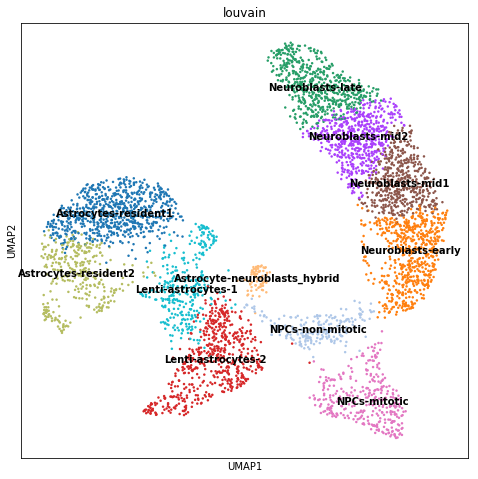

In [9]:
sc.pl.umap(adata_experiment_neural, color='louvain', legend_loc='on data')

#### Mitochondrial fraction

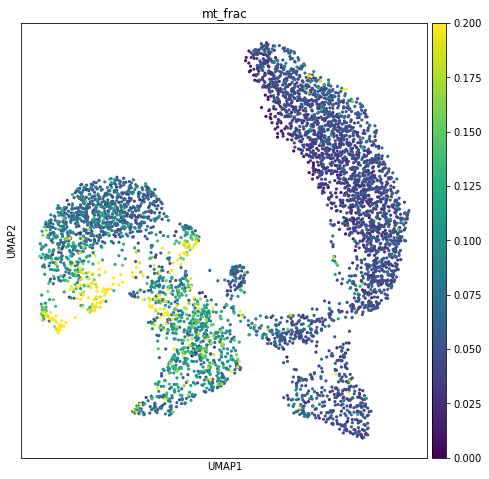

In [10]:
# Figure S6F
sc.pl.umap(adata_experiment_neural, color='mt_frac', vmax=0.2, size=40, 
          save='_BL41-42Only_mitoFrac.pdf')

#### Astrocyte markers

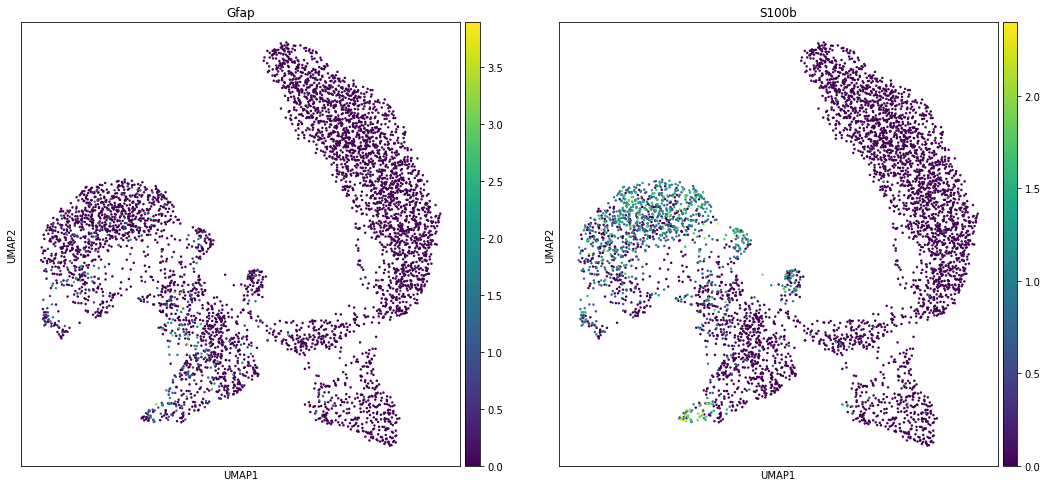

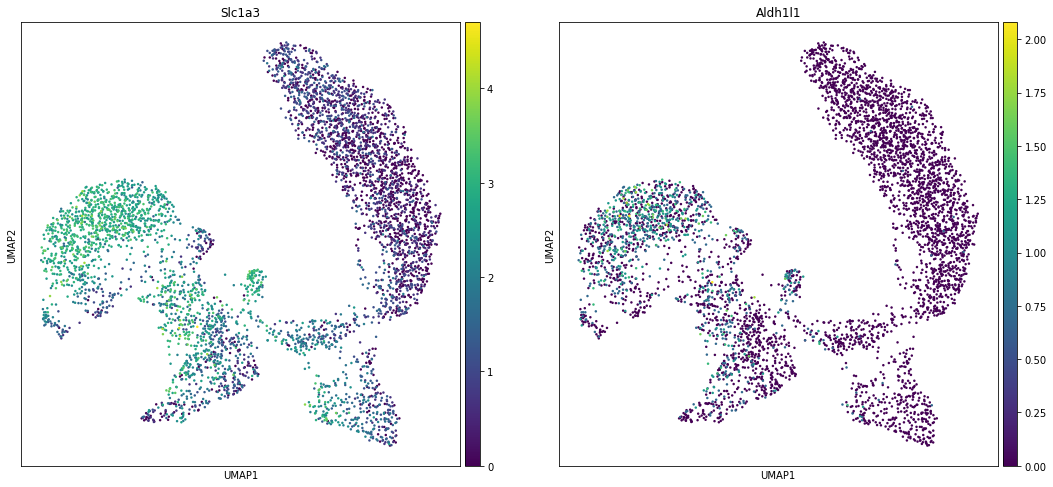

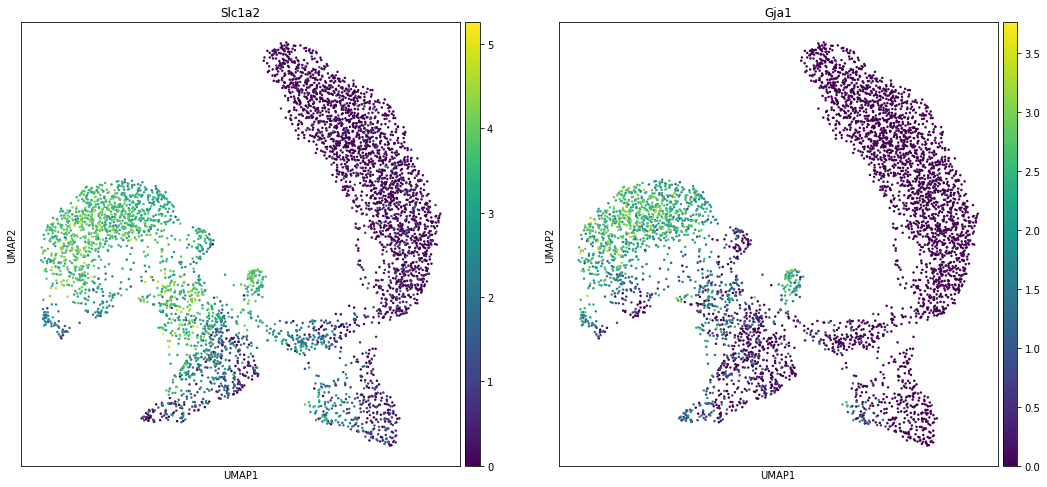

In [14]:
sc.pl.umap(adata_experiment_neural, color=['Gfap', 'S100b'], use_raw=True)
sc.pl.umap(adata_experiment_neural, color=['Slc1a3', 'Aldh1l1'], use_raw=True)
sc.pl.umap(adata_experiment_neural, color=['Slc1a2', 'Gja1'], use_raw=True)

#### Slice the dataset to keep only resident astrocytes

In [11]:
adata_RA = adata_experiment_neural[adata_experiment_neural.obs['louvain'].isin(['Astrocytes-resident1', 'Astrocytes-resident2'])]

In [12]:
adata_RA

View of AnnData object with n_obs × n_vars = 1081 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [13]:
sc.tl.rank_genes_groups(adata_RA, 'louvain', groups='all', reference='rest', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


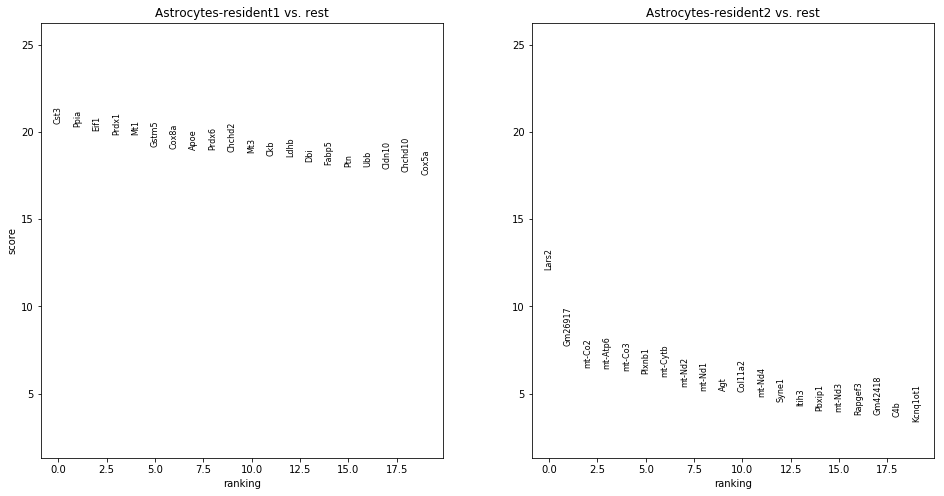

In [14]:
sc.pl.rank_genes_groups(adata_RA, n_genes=20, sharey=True)

In [15]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100)

,Astrocytes-resident1,Astrocytes-resident2
0,Cst3,Lars2
1,Ppia,Gm26917
2,Eif1,mt-Co2
3,Prdx1,mt-Atp6
4,Mt1,mt-Co3
...,...,...
95,Il18,Ddr1
96,Cmtm5,Gli2
97,Dad1,Nebl
98,Ndufb4,Ptprs


In [24]:
DEG_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/outs/DEGs'

In [25]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100).to_csv(DEG_dir + '/louvain_BL41-42Only_DEGs_ResidentAstrocytesOnly.csv', index=False)

### Remove high mito cells

In [16]:
adata_RA = adata_RA[adata_RA.obs['mt_frac']<0.1]

In [17]:
adata_RA

View of AnnData object with n_obs × n_vars = 798 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

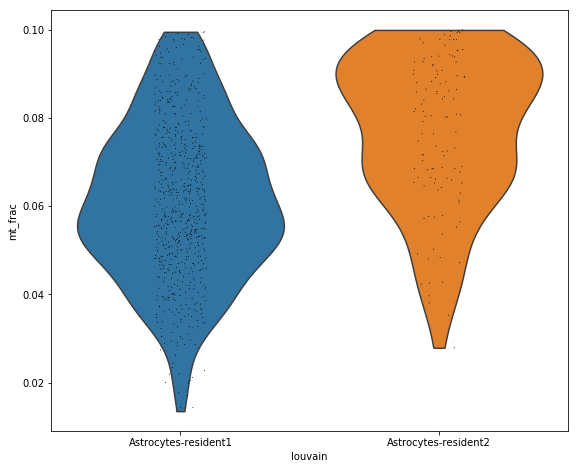

In [18]:
sc.pl.violin(adata_RA, keys='mt_frac', groupby='louvain')

In [19]:
sc.tl.rank_genes_groups(adata_RA, 'louvain', groups='all', reference='rest', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


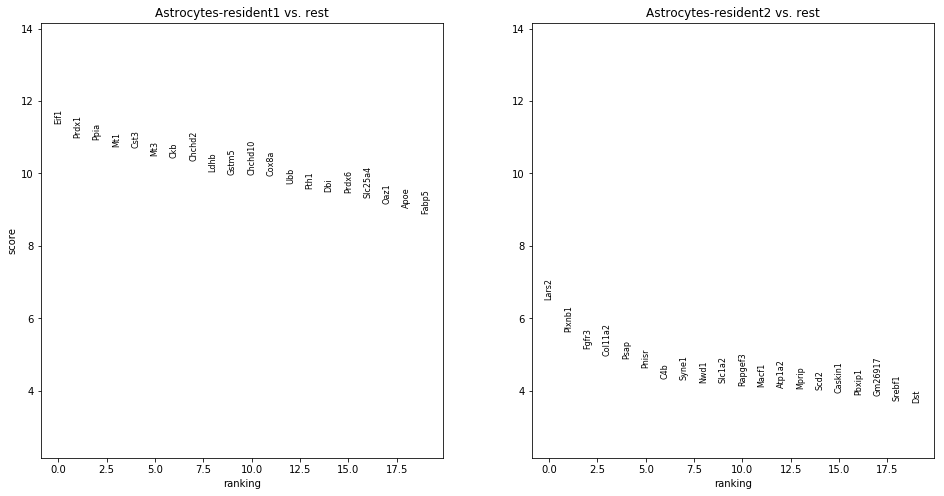

In [20]:
sc.pl.rank_genes_groups(adata_RA, n_genes=20, sharey=True)

In [21]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100)

,Astrocytes-resident1,Astrocytes-resident2
0,Eif1,Lars2
1,Prdx1,Plxnb1
2,Ppia,Fgfr3
3,Mt1,Col11a2
4,Cst3,Psap
...,...,...
95,1810037I17Rik,Fam120b
96,Ndufb4,Wsb1
97,Bmyc,AC149090.1
98,Ndufb7,Bmpr1b


In [41]:
DEG_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/outs/DEGs'

In [42]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100).to_csv(DEG_dir + '/louvain_BL41-42Only_DEGs_ResidentAstrocytesOnly_lowMito.csv', index=False)

### OxPhos genes

In [22]:
oxphos_genes = ["Abcd1",
"Actn3",
"Actn3",
"Afg1l",
"Ak4",
"Apoc3",
"Atp5a1",
"Atp5b",
"Atp5b",
"Atp5c1",
"Atp5d",
"Atp5h",
"Atp5j",
"Atp5j2",
"Atp5l",
"Atp5o",
"Atp5pb",
"Atp7a",
"Atpsckmt",
"Atpsckmt",
"Bdnf",
"Bid",
"Ccnb1",
"Cdk1",
"Chchd10",
"Coq7",
"Coq9",
"Cox4i1",
"Cox4i2",
"Cox5a",
"Cox5b",
"Cox5b",
"Cox6a1",
"Cox6a2",
"Cox7a1",
"Cox7a2",
"Cox7a2l",
"Cox7a2l",
"Cox7c",
"Cyc1",
"Cyc1",
"Cycs",
"Cycs",
"Cyct",
"Cyct",
"Dguok",
"Dld",
"Dnajc15",
"Dnajc30",
"Fxn",
"Fxn",
"Gadd45gip1",
"Iscu",
"Lexm",
"Mecp2",
"Mlxipl",
"Msh2",
"mt-Atp6",
"mt-Co1",
"mt-Co2",
"mt-Co3",
"mt-Cytb",
"mt-Nd2",
"mt-Nd4",
"mt-Nd4",
"mt-Nd4l",
"mt-Nd5",
"Mtch2",
"Myc",
"Myc",
"Myog",
"Ndufa7",
"Ndufa7",
"Ndufa8",
"Ndufa10",
"Ndufa10",
"Ndufa12",
"Ndufaf1",
"Ndufb6",
"Ndufb6",
"Ndufb6",
"Ndufb8",
"Ndufb9",
"Ndufc2",
"Ndufs1",
"Ndufs2",
"Ndufs2",
"Ndufs6",
"Ndufs8",
"Ndufv1",
"Ndufv1",
"Ndufv2",
"Ndufv2",
"Ndufv3",
"Ndufv3",
"Nipsnap2",
"Nupr1",
"Park7",
"Park7",
"Pde2a",
"Pde12",
"Pgk1",
"Pgk2",
"Pink1",
"Pink1",
"Ppif",
"Rhoa",
"Sdha",
"Sdhaf2",
"Sdhaf2",
"Sdhc",
"Sdhd",
"Shmt2",
"Shmt2",
"Shmt2",
"Slc25a23",
"Slc25a33",
"Snca",
"Stoml2",
"Stoml2",
"Surf1",
"Taz",
"Tefm",
"Tnf",
"Uqcc2",
"Uqcc2",
"Uqcc3",
"Uqcc3",
"Uqcr10",
"Uqcrb",
"Uqcrc1",
"Uqcrc1",
"Uqcrfs1",
"Uqcrh",
"Uqcrq",
"Vcp"]

In [23]:
index = []
for gene in oxphos_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_RA.raw.var.index)

In [24]:
len(oxphos_genes)

136

In [25]:
oxphos_genes = list(compress(oxphos_genes, index))

In [26]:
len(oxphos_genes)

129

In [27]:
adata_RA.obs['oxphos_genes_mean'] = np.array(adata_RA.raw[:,oxphos_genes].X.mean(axis=1)).flatten()

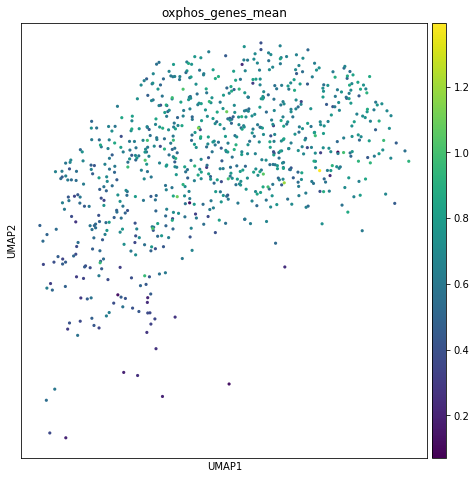

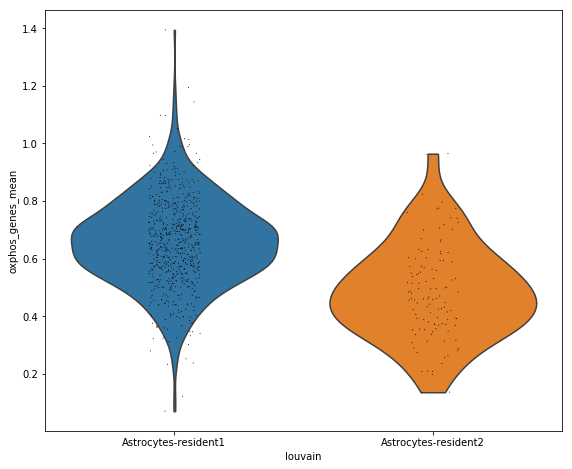

In [28]:
sc.pl.umap(adata_RA, color='oxphos_genes_mean', size=40, 
#          save='_experimental_MT_oxphos_129genes.pdf'
          )

# Figure S6G
sc.pl.violin(adata_RA, keys='oxphos_genes_mean', groupby='louvain', save='_lowMito_RA_oxphos.pdf')

### Astrocyte markers (n=12)

In [29]:
# Taken from https://www.frontiersin.org/articles/10.3389/fncel.2016.00215/full
astrocyte_markers = ['Aldoc', 'Aqp4', 'Aldh1l1', 'Gja1', 'Gfap', 'Slc1a2', 'Slc1a3', 'Nfia', 'Nes', 'Pygb', 'S100b', 'Vim']

In [30]:
index = []
for gene in astrocyte_markers:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_RA.raw.var.index)

In [31]:
len(astrocyte_markers)

12

In [32]:
astrocyte_markers = list(compress(astrocyte_markers, index))

In [33]:
len(astrocyte_markers)

12

In [34]:
adata_RA.obs['astrocyte_markers_mean'] = np.array(adata_RA.raw[:,astrocyte_markers].X.mean(axis=1)).flatten()

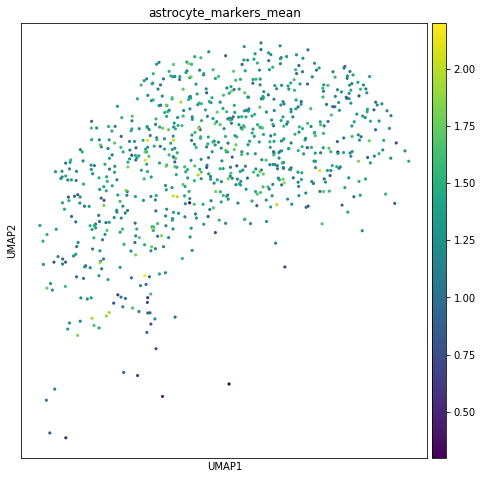

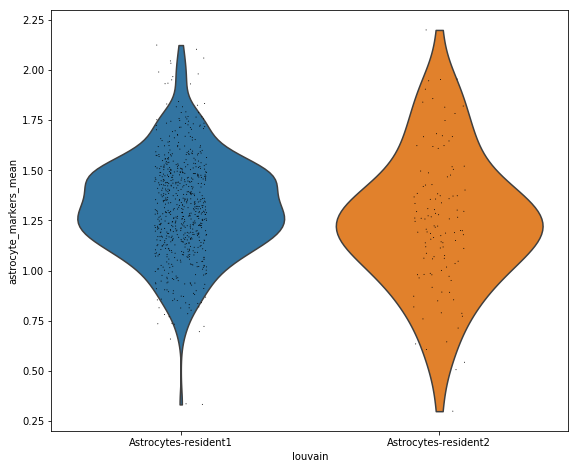

In [35]:
sc.pl.umap(adata_RA, color='astrocyte_markers_mean', size=40, 
          save='_experimental_MT_astrocyte_markers_mean.pdf')

# Figure S6G
sc.pl.violin(adata_RA, keys='astrocyte_markers_mean', groupby='louvain', save='_lowMito_RA_astroMarkers.pdf')